# Configuración inicial

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/luis/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /home/luis/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /home/luis/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /home/luis/nltk_data..

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Analizando un texto

In [4]:
# escogemos text1 que es el famoso libro Moby Dick
text1


<Text: Moby Dick by Herman Melville 1851>

In [5]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [6]:
len(text1)

260819

## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [9]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html

# el voculario es la lista de palabras unicas de un lenguaje

vocabulario = list(set(text1))
vocabulario[1000:1050]


['WISE',
 'concerned',
 'relative',
 'anticipated',
 'busying',
 'superhuman',
 'adown',
 'unmolested',
 'inclusive',
 'anger',
 'regularity',
 'smoothe',
 'mobbing',
 'mug',
 'auspices',
 'plunged',
 'stark',
 'ripples',
 'manipulator',
 'warriors',
 'INTO',
 'Splice',
 'cluster',
 'coils',
 'Sir',
 'appoint',
 'bladed',
 'souls',
 'concernment',
 'human',
 'wheeling',
 'ladder',
 'madman',
 'woodland',
 'too',
 'pauselessly',
 'insisted',
 'billow',
 'sown',
 'unsophisticated',
 'stepping',
 'immutably',
 'likes',
 'averted',
 'directing',
 'gleaming',
 'discernible',
 'consumed',
 'Burkes',
 'destructive']

In [10]:
vocabulario = sorted(set(text1))
vocabulario[1000:1050]


['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [11]:
rl = len(vocabulario) / len(text1)
rl

0.07406285585022564

In [13]:
len(set(text1))

19317

In [12]:
def lexical_richness(text):
    return len(set(text)) / len(text)

In [14]:
lexical_richness(text1)


0.07406285585022564

In [15]:
lexical_richness(text2)


0.04826383002768831

In [16]:
def word_percentage(word, text):
    return 100 * text.count(word) / len(text)

In [17]:
word_percentage('monster', text1)


0.018786974875296663

In [19]:
word_percentage('the', text1)


5.260736372733581

In [20]:
text1.count('monster')


49

In [21]:
text1.count('the')


13721

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


In [22]:
# calculando una distribución de frecuencias de palabras
wordMap = {}
# este metodo no es recomendado ya que toma mucho tiempo en ejecutarse
# son mas de 260 mil palabras
for palabra in set(text1):
  wordMap[palabra] = text1.count(palabra)

wordMap

{'basis': 3,
 'lipless': 1,
 'cutting': 35,
 'imperilled': 2,
 'guns': 4,
 'exceeding': 12,
 'sinking': 13,
 'foremastmen': 1,
 'tin': 2,
 'Miserable': 1,
 'BIOGRAPHY': 1,
 'Never': 10,
 'commissioned': 2,
 'spake': 3,
 'kentledge': 1,
 'searchingly': 1,
 'Soothed': 1,
 'boastful': 1,
 'rugged': 1,
 'sadness': 2,
 'regularly': 18,
 'ills': 1,
 'stairs': 10,
 'smoky': 3,
 'refuse': 6,
 'shalt': 3,
 'AND': 37,
 'Rinaldini': 1,
 'severest': 4,
 'Atlantics': 1,
 'presenting': 2,
 'bulwarks': 36,
 'publisher': 1,
 'tinges': 1,
 'plantation': 3,
 'fattening': 1,
 'Napoleon': 3,
 'eve': 4,
 'masculine': 1,
 'CUVIER': 1,
 'abreast': 3,
 'contrast': 12,
 'formation': 3,
 'marred': 2,
 'Steward': 2,
 'hump': 25,
 'augment': 4,
 'becharmed': 2,
 'Art': 2,
 'shows': 7,
 'Perth': 18,
 'relieve': 3,
 'superiority': 6,
 'finical': 1,
 'plebeian': 1,
 'bust': 2,
 'deserving': 1,
 'problematical': 1,
 'laughed': 7,
 'hypo': 1,
 'ranks': 2,
 'grasped': 6,
 'expansive': 2,
 'Rhyme': 2,
 'articles': 10,
 

## Método FreqDist de NLTK

In [27]:
fdist = FreqDist(text1)
fdist

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [28]:
fdist.most_common()


[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624),
 ('The', 612),
 ('their', 612),
 ('are', 586),
 ('they', 586),
 ('an', 582),
 ('some', 578),
 ('then', 571),
 ('my', 564),
 ('when', 553),
 ('upon', 538),
 ('out', 529),
 ('into', 520),
 ('man', 508),
 ('ship', 507),
 ('up', 505),
 ('mor

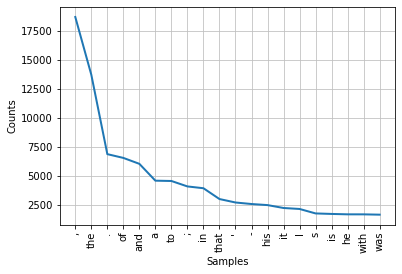

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
fdist.plot(20)

In [32]:
fdist['monster']

49